In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nets import WeakRM

import warnings
warnings.filterwarnings('ignore')

In [2]:
project_dir = ''
data_dir = project_dir + 'data/ac4C/data_for_mil/non_base_data/'
checkpoint_filepath = project_dir + ''

int_u5 = np.load(data_dir + 'u5_ac4c_seq.npy', allow_pickle=True).astype(np.float32)
int_u3 = np.load(data_dir + 'u3_ac4c_seq.npy', allow_pickle=True).astype(np.float32)

instance_len = int_u3.shape[2]

int_u3.shape, instance_len

((2600, 56, 50, 4), 50)

In [3]:
model = WeakRM()
model(int_u3[0].reshape(1, -1, 50, 4))
model.load_weights(checkpoint_filepath)

In [4]:
u3_predictions = []
u3_weights = []
for i in np.arange(int_u3.shape[0]):
    y_pred, a_weights = model(int_u3[i].reshape(1, -1, 50, 4), training=False)
    u3_predictions.append(y_pred)
    u3_weights.append(a_weights)
u3_predictions = np.concatenate(u3_predictions, axis=0)
u3_weights = np.concatenate(u3_weights, axis=0)

u3_ind = [i[0] for i in sorted(enumerate(u3_predictions), key=lambda x:x[1],reverse=True) if
          u3_predictions[i[0]] > 0.5]

In [5]:
u5_predictions = []
u5_weights = []
for i in np.arange(int_u5.shape[0]):
    y_pred, a_weights = model(int_u5[i].reshape(1, -1, 50, 4), training=False)
    u5_predictions.append(y_pred)
    u5_weights.append(a_weights)
u5_predictions = np.concatenate(u5_predictions, axis=0)
u5_weights = np.concatenate(u5_weights, axis=0)

u5_ind = [i[0] for i in sorted(enumerate(u5_predictions), key=lambda x:x[1],reverse=True) if
       u5_predictions[i[0]] > 0.5]

Text(0, 0.5, 'Density of most important instance')

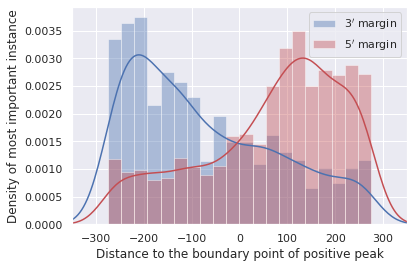

In [6]:
sns.set(style='darkgrid')
u3_best_weights = np.argmax(u3_weights[u3_ind], axis=1)
u5_best_weights = np.argmax(u5_weights[u5_ind], axis=1)
ax = sns.distplot(-300 + u3_best_weights*10 + 25, bins=20, kde=True, label='3$^\prime$ margin')
ax = sns.distplot(-300 + u5_best_weights*10 + 25, bins=20, kde=True, color='r', label='5$^\prime$ margin')
ax.legend()
ax.set_xlim(-350, 350)
ax.set_xlabel('Distance to the boundary point of positive peak')
ax.set_ylabel('Density of most important instance')